In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.8 MB/s eta 0:00:00


In [2]:
#SARIMAX - SARIMA - (Exogenous X variables as well) SARIMA + XVariables

In [16]:
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [6]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/co2_mm_mlo.csv")

In [ ]:
df.head()

In [9]:
df['date'] = pd.to_datetime(dict(year = df['year'], month = df['month'],day= 1))

In [ ]:
df.set_index('date',inplace = True)

In [13]:
df.index.freq = 'MS'

In [ ]:
df.head()

In [ ]:
df['interpolated'].plot(figsize = (12,6))

In [ ]:
result = seasonal_decompose(df['interpolated'],model = 'add')
result.plot();

In [ ]:
result = seasonal_decompose(df['interpolated'],model = 'mul')
result.plot();

In [22]:
auto_arima(df['interpolated'],m=12,seasonal = True).summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,2)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.256
Date:                            Sun, 25 Jun 2023   AIC                            424.512
Time:                                    04:03:50   BIC                            452.053
Sample:                                03-01-1958   HQIC                           435.139
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3509      0.043      8.165      0.000       0.267       0.435
ar.L2          0.0868      0.046      1.904      0.057      -0.003       0.176
ma.L1         -0.7060      0.051    -13.925      0.000      -0.805      -0.607
ar.S.L12       0.9996      0.000   2987.104      0.000       0.999       1.000
ma.S.L12      -0.8659      0.021    -40.597      0.000      -0.908      -0.824
sigma2         0.0957      0.005     20.370      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#(p,d,q)#AR  and residuals without the seasonality
#(P,D,Q,M)#AR and residuals trying to model the seasonality seperately

In [48]:
train = df.iloc[:717]
test = df.iloc[717:]

In [50]:
model = SARIMAX(train['interpolated'],order= (2,1,1), sesonal_order = (1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           interpolated   No. Observations:                  717
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -748.853
Date:                Sun, 25 Jun 2023   AIC                           1505.706
Time:                        04:22:54   BIC                           1524.001
Sample:                    03-01-1958   HQIC                          1512.771
                         - 11-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5336      0.027     57.370      0.000       1.481       1.586
ar.L2         -0.8294      0.029    -28.994      0.000      -0.885      -0.773
ma.L1         -0.7850      0.033    -23.672      0.000      -0.850      -0.720
sigma2         0.4728      0.023     20.335      0.000       0.427       0.518
===================================================================================
Ljung-Box (L1) (Q):                   4.61   Jarque-Bera (JB):                23.58
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                             0.42
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start = start, end = end, dynamic = False, typ ='levels').rename("SARIMA")
#dynamic = False -> forecast on each level is based on the all the lagged value
#typ = 'levels' actually uses the original levels of endogenous variables, typ ='linear' - we would have linear predictions

In [52]:
for i in range(len(predictions)):
  print(f'predicted={predictions[i]}, expected{test["interpolated"][i]} ppm')

predicted=406.81570671237813, expected406.81 ppm
predicted=408.1804895805485, expected407.96 ppm
predicted=408.86716418474543, expected408.32 ppm
predicted=408.788349671169, expected409.41 ppm
predicted=408.0979798693577, expected410.24 ppm
predicted=407.10459720800117, expected411.24 ppm
predicted=406.153714560139, expected410.79 ppm
predicted=405.5193163872664, expected408.71 ppm
predicted=405.3350296845278, expected406.99 ppm
predicted=405.57855260119675, expected405.51 ppm
predicted=406.1048582774969, expected406.0 ppm
predicted=406.7100303832183, expected408.02 ppm


<Axes: xlabel='date'>

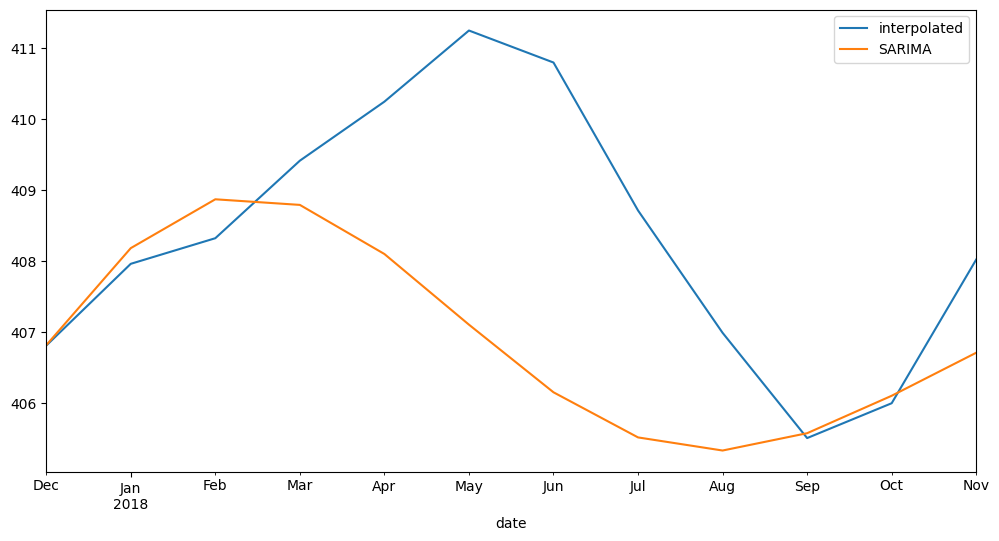

In [53]:
test['interpolated'].plot(legend = True, figsize = (12,6))
predictions.plot(legend = True)

In [47]:
#Do a for loop based grid search..../

## SARIMAX

In [ ]:
#SARIMA #Exogenous variables

In [ ]:
!pip install pmdarima

In [ ]:
#SARIMAX - SARIMA - (Exogenous X variables as well) SARIMA + XVariables

In [ ]:
from pmdarima import auto_arima

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/datasets/RestaurantVisitors.csv",index_col = 'date', parse_dates = True)

In [55]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [56]:
df.isna().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [59]:
df_nona = df.dropna()

In [62]:
df_nona.isna()

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

<Axes: xlabel='date'>

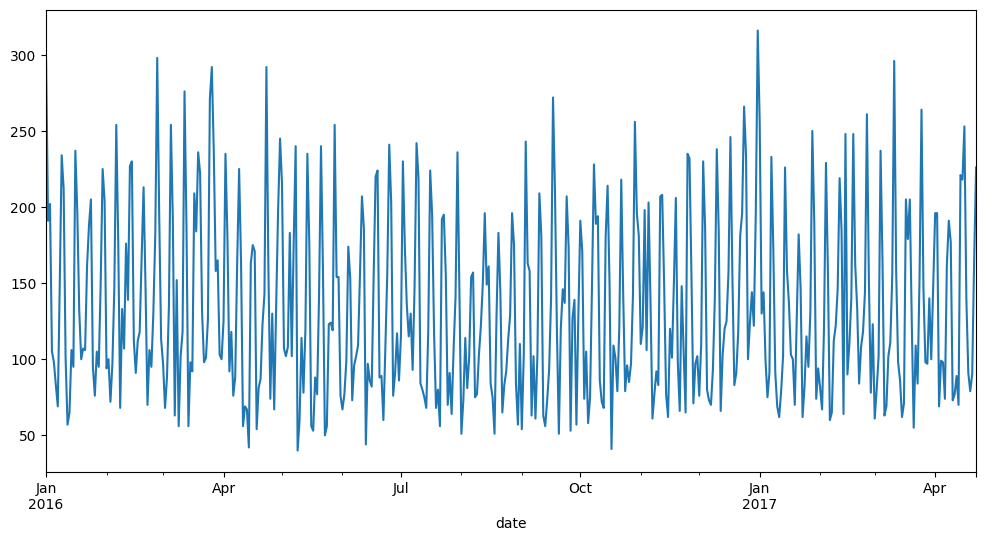

In [63]:
df_nona['total'].plot(figsize = (12,6))

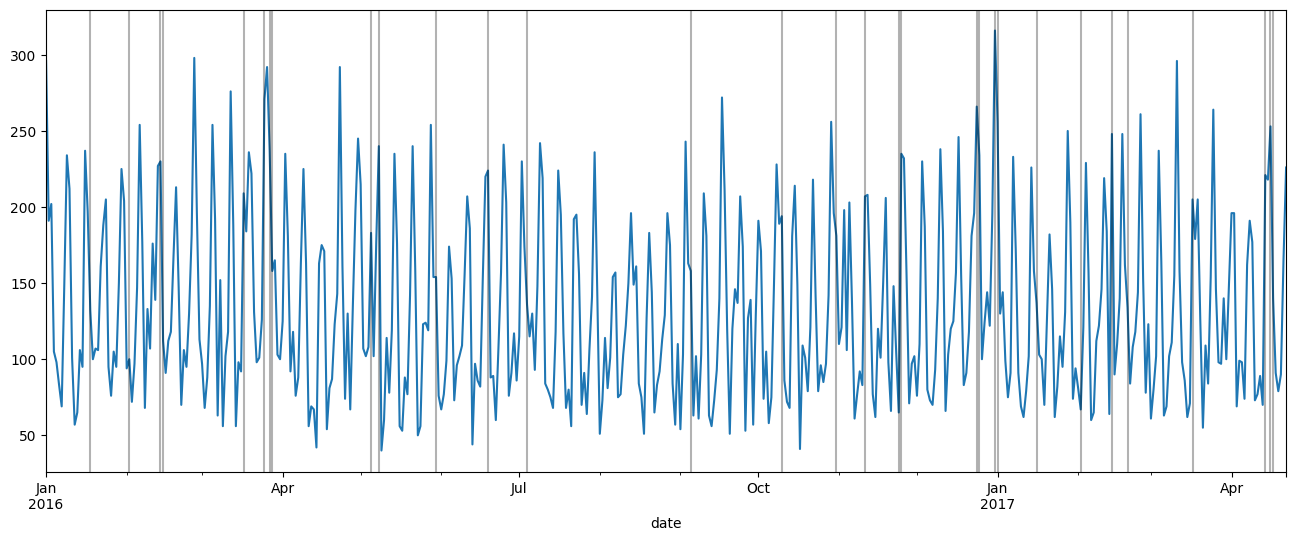

In [69]:
ax = df_nona['total'].plot(figsize = (16,6))
for x in df_nona.query('holiday==1').index:
  ax.axvline(x=x,color = 'k', alpha = 0.3)

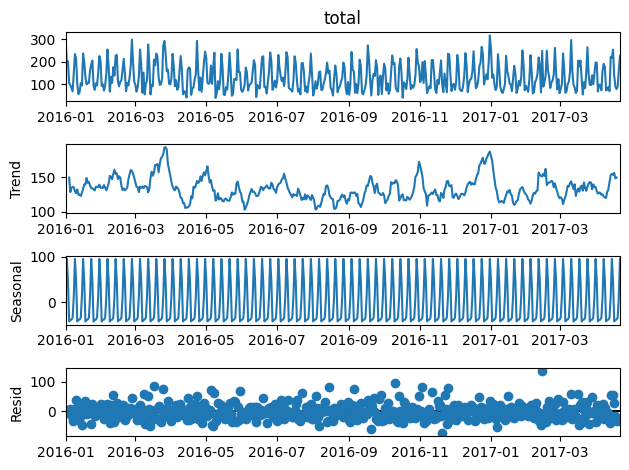

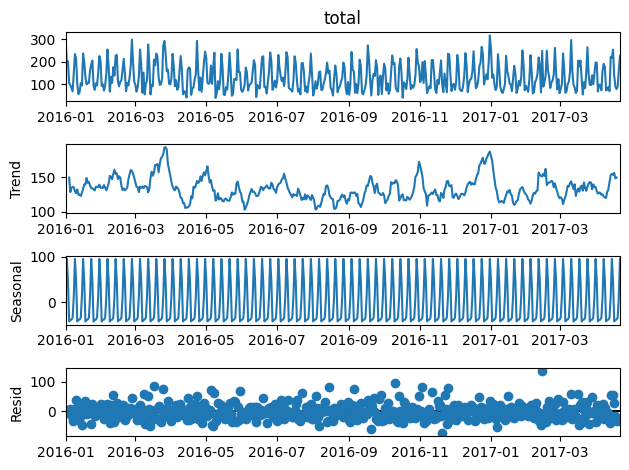

In [70]:
result = seasonal_decompose(df_nona['total'])
result.plot()

In [73]:
auto_arima(df_nona['total'], seasonal = True, m= 6).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  478
Model:             SARIMAX(2, 0, 4)x(2, 0, [1, 2], 6)   Log Likelihood               -2473.529
Date:                                Sun, 25 Jun 2023   AIC                           4971.059
Time:                                        04:56:06   BIC                           5021.094
Sample:                                    01-01-2016   HQIC                          4990.730
                                         - 04-22-2017                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    118.9604     24.706      4.815      0.000      70.538     167.382
ar.L1         -0.4450      0.007    -66.516      0.000      -0.458      -0.432
ar.L2         -0.9928      0.007   -136.985      0.000      -1.007      -0.979
ma.L1          0.8316      0.051     16.222      0.000       0.731       0.932
ma.L2          1.3861      0.068     20.292      0.000       1.252       1.520
ma.L3          0.4733      0.067      7.101      0.000       0.343       0.604
ma.L4          0.2447      0.053      4.615      0.000       0.141       0.349
ar.S.L6        1.2008      0.099     12.097      0.000       1.006       1.395
ar.S.L12      -0.5713      0.106     -5.387      0.000      -0.779      -0.363
ma.S.L6       -0.8784      0.128     -6.850      0.000      -1.130      -0.627
ma.S.L12       0.1501      0.136      1.105      0.269      -0.116       0.416
sigma2      1987.6928    155.028     12.822      0.000    1683.844    2291.541
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):                18.75
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.47
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ext

In [74]:
train = df_nona.iloc[:436]
test = df_nona.iloc[436:]

In [75]:
model = SARIMAX(train['total'],exog = train['holiday'],order = (2, 0, 4),seasonal_order = (2, 0, 1, 6))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(2, 0, 4)x(2, 0, [1], 6)   Log Likelihood               -2394.965
Date:                             Sun, 25 Jun 2023   AIC                           4811.931
Time:                                     05:06:59   BIC                           4856.785
Sample:                                 01-01-2016   HQIC                          4829.632
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday      189.3331      9.812     19.296      0.000     170.102     208.564
ar.L1          0.0097      0.074      0.131      0.896      -0.135       0.155
ar.L2          0.9903      0.074     13.331      0.000       0.845       1.136
ma.L1          0.1789      0.093      1.929      0.054      -0.003       0.361
ma.L2         -1.4925      0.081    -18.346      0.000      -1.652      -1.333
ma.L3         -0.1782      0.074     -2.425      0.015      -0.322      -0.034
ma.L4          0.5017      0.068      7.410      0.000       0.369       0.634
ar.S.L6        1.2335      0.149      8.256      0.000       0.941       1.526
ar.S.L12      -0.2412      0.089     -2.707      0.007      -0.416      -0.067
ma.S.L6       -0.9799      0.162     -6.067      0.000      -1.296      -0.663
sigma2      4163.9336    414.977     10.034      0.000    3350.593    4977.274
===================================================================================
Ljung-Box (L1) (Q):                   2.45   Jarque-Bera (JB):                23.17
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.03
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
start = len(train)
end = len(train)+len(test)-1
exog_forecast = test[['holiday']]
predictions = results.predict(start = start, end = end,exog = exog_forecast, dynamic = False, typ ='levels').rename("SARIMAX - (with exogenous)")
#dynamic = False -> forecast on each level is based on the all the lagged value
#typ = 'levels' actually uses the original levels of endogenous variables, typ ='linear' - we would have linear predictions

<Axes: xlabel='date'>

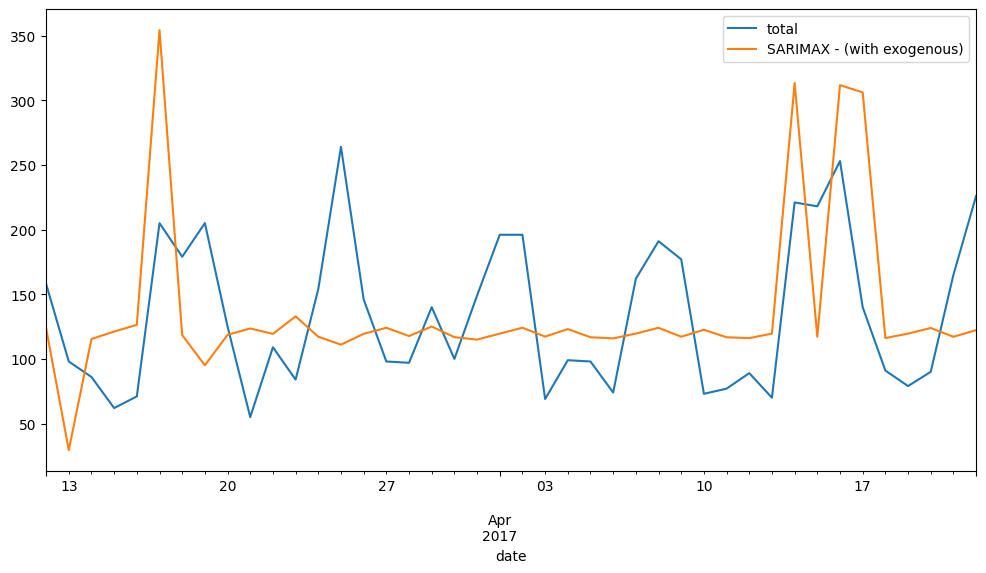

In [79]:
test['total'].plot(legend = True, figsize = (12,6))
predictions.plot(legend = True)

In [80]:
from statsmodels.tools.eval_measures import rmse
rmse(test['total'],predictions)

66.56619349364291